In [2]:
import glob
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pb = pd.read_csv('public_leaderboard.csv',header=None)
pb.columns = ['experiment', 'rmse']
pb

,experiment,rmse
0,01-01,156.223821
1,01-02,156.223821


In [18]:
cv = []
for filepath in glob.glob(os.path.join('*', 'metrics.json')):
    experiment = os.path.split(filepath)[0]
    with open(filepath, 'r') as f:
        metrics = json.load(f)
    cv.append([experiment, metrics['valid_losses_avg'], metrics['valid_losses_std'], metrics['valid_loss']])
cv = pd.DataFrame(cv, columns=['experiment', 'valid_losses_avg', 'valid_losses_std', 'valid_loss'])
cv

,experiment,valid_losses_avg,valid_losses_std,valid_loss
0,01-01,108.884375,2.360160,199.964769
1,01-02,106.999095,3.006433,199.099051
2,01-03,122.039748,2.513364,203.720097


In [19]:
cv_pb = pd.merge(cv, pb, how='left')
cv_pb

,experiment,valid_losses_avg,valid_losses_std,valid_loss,rmse
0,01-01,108.884375,2.360160,199.964769,156.223821
1,01-02,106.999095,3.006433,199.099051,156.223821
2,01-03,122.039748,2.513364,203.720097,NaN


,valid_losses_avg,valid_losses_std,valid_loss,rmse
valid_losses_avg,1.000000,-0.398674,0.998089,NaN
valid_losses_std,-0.398674,1.000000,-0.454588,NaN
valid_loss,0.998089,-0.454588,1.000000,NaN
rmse,NaN,NaN,NaN,NaN


<Figure size 648x648 with 0 Axes>

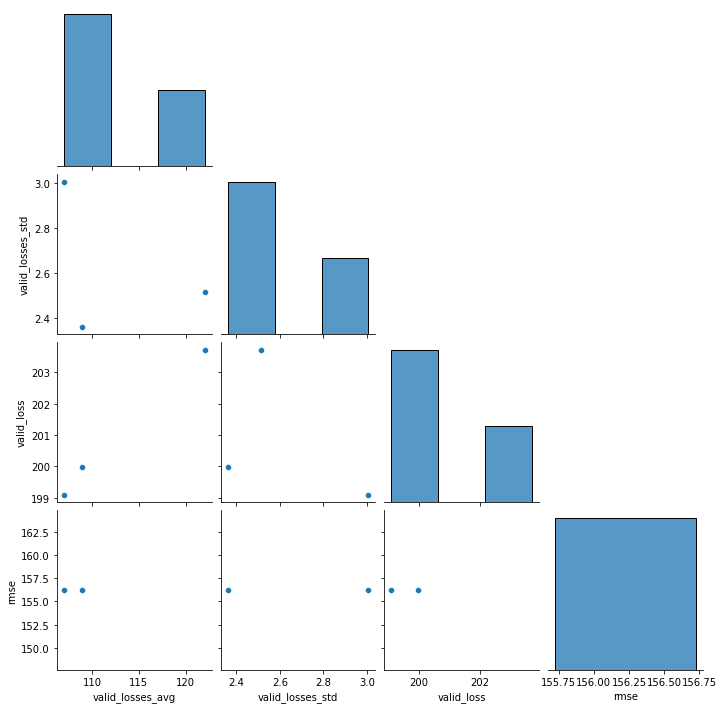

In [20]:
plt.figure(figsize=(9, 9))
sns.pairplot(cv_pb, corner=True)
cv_pb.corr()